#  Fantasy English Premier League data

## Loading libraries

In [1]:
import numpy as np
import pandas as pd
import pandas_profiling
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from bokeh.plotting import figure, ColumnDataSource 
from bokeh.io import output_file, show, output_notebook
from bokeh.models import HoverTool, CrosshairTool, PanTool, ZoomInTool, ZoomOutTool
output_notebook()

Loading BokehJS ...

## Data source
https://decd.co/epl-data

Data dictionary: 

–name: Name of the player<br>
–club: Club of the player<br>
–age : Age of the player<br>
–position : The usual position on the pitch<br>
–position_cat : 1 for attackers, 2 for midfielders, 3 for defenders, 4 for goalkeepers<br>
–market_value : As on transfermrkt.com on July 20th, 2017<br>
–page_views : Average daily Wikipedia page views from September 1, 2016 to May 1, 2017<br>
–fpl_value : Value in Fantasy Premier League as on July 20th, 2017<br>
–fpl_sel : % of FPL players who have selected that player in their team<br>
–fpl_points : FPL points accumulated over the previous season<br>
–region: 1 for England, 2 for EU, 3 for Americas, 4 for Rest of World<br>
–nationality<br>
–new_foreign : Whether a new signing from a different league, for 2017/18 (till 20th July)<br>
–age_cat<br>
–club_id<br>
–big_club: Whether one of the Top 6 clubs<br>
–new_signing: Whether a new signing for 2017/18 (till 20th July)

## Loading data

In [2]:
df = pd.read_excel('./datasets/transformed_epl_data.xlsx')

In [3]:
df.shape

(461, 25)

In [4]:
pd.set_option('max_colwidth', 800)
df.head()

,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,...,big_club,new_signing,,.1,.2,.3,.4,.5,.6,.7
0,Alexis Sanchez,Arsenal,28,LW,Attacker,65.0,4329,12.0,17.1,264,...,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Mesut Ozil,Arsenal,28,AM,Attacker,50.0,4395,9.5,5.6,167,...,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Petr Cech,Arsenal,35,GK,Goalkeeper,7.0,1529,5.5,5.9,134,...,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Theo Walcott,Arsenal,28,RW,Attacker,20.0,2393,7.5,1.5,122,...,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Laurent Koscielny,Arsenal,31,CB,Defence,22.0,912,6.0,0.7,121,...,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.columns

Index(['name', 'club', 'age', 'position', 'position_cat', 'market_value',
       'page_views', 'fpl_value', 'fpl_sel', 'fpl_points', 'region',
       'nationality', 'new_foreign', 'age_cat', 'club_id', 'big_club',
       'new_signing', ' ', ' .1', ' .2', ' .3', ' .4', ' .5', ' .6', ' .7'],
      dtype='object')

In [6]:
columns_to_drop = [' ', ' .1', ' .2', ' .3', ' .4', ' .5', ' .6', ' .7']
df = df.drop(columns=columns_to_drop)

## Data exploration

In [7]:
pandas_profiling.ProfileReport(df)

Number of variables,17
Number of observations,461
Total Missing (%),0.0%
Total size in memory,61.3 KiB
Average record size in memory,136.2 B
Numeric,7
Categorical,5
Boolean,3
Date,0
Text (Unique),1
Rejected,1


### Core pandas dataframe plot function

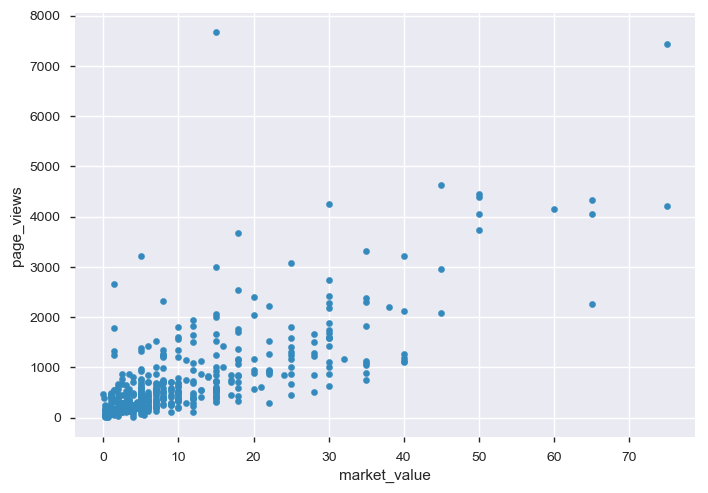

In [8]:
# let's plot a scatter plot between players' market_value and page_view using pandas dataframe plot function
df.plot.scatter(x='market_value', y='page_views')

### Matplotlib scatter plot function

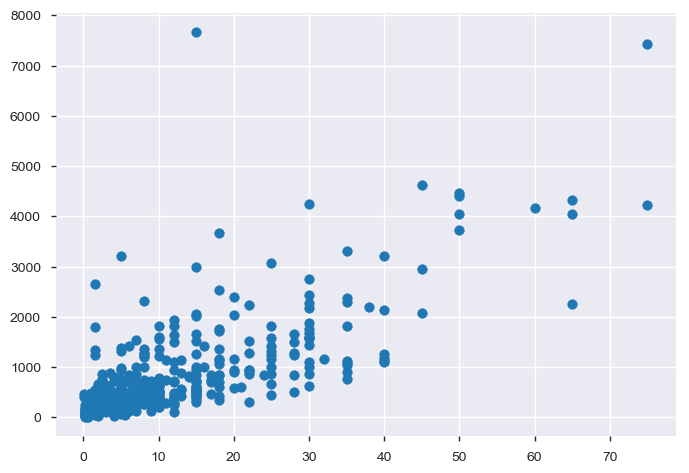

In [9]:
# let's plot a scatter plot between players' market_value and page_view using matplotlib directly
plt.scatter(df.market_value, df.page_views)

Text(0.5, 1.0, 'English Premier League')

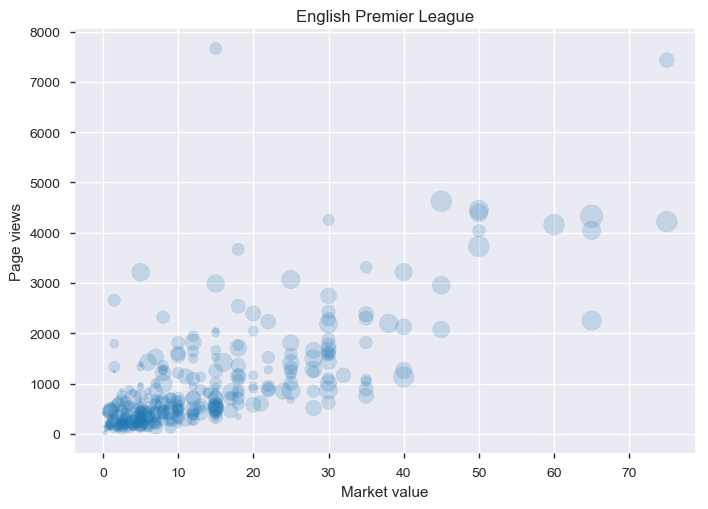

In [10]:
# let's add an extra dimension, where the size of the points is based on the fantasy points
plt.scatter(df.market_value, df.page_views, s=df.fpl_points, alpha=0.2)
plt.xlabel("Market value")
plt.ylabel("Page views")
plt.title("English Premier League")

### Seaborn plot function

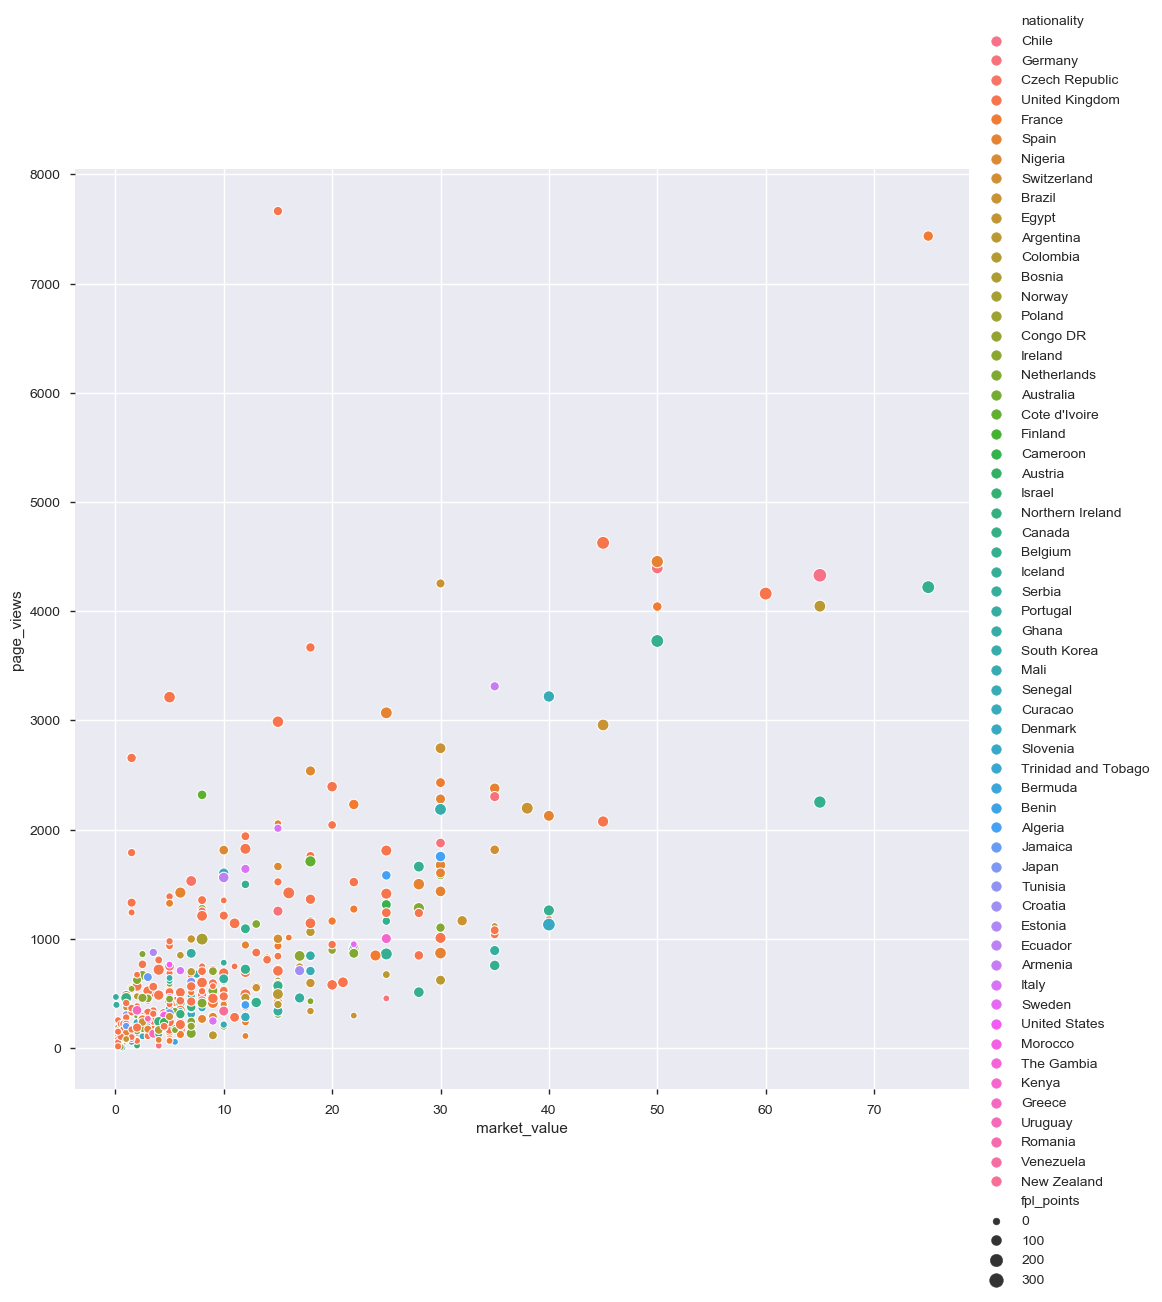

In [11]:
sns.relplot(x="market_value", y="page_views", hue="nationality", size="fpl_points", data=df, height=10)

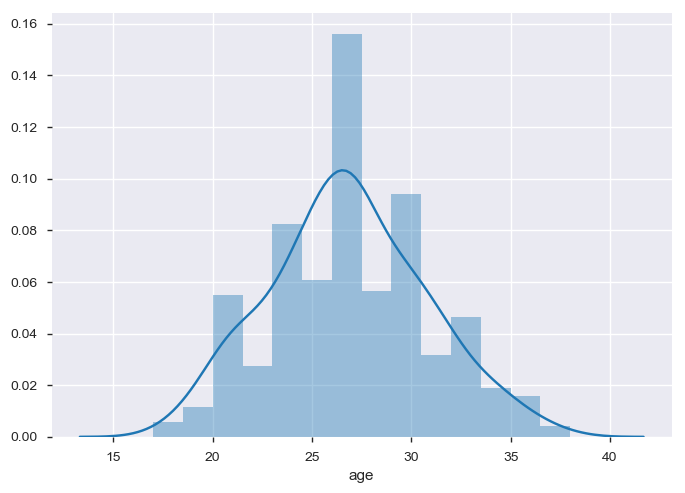

In [12]:
# let's look at the age distribution of players using a histogram
sns.distplot(df.age)

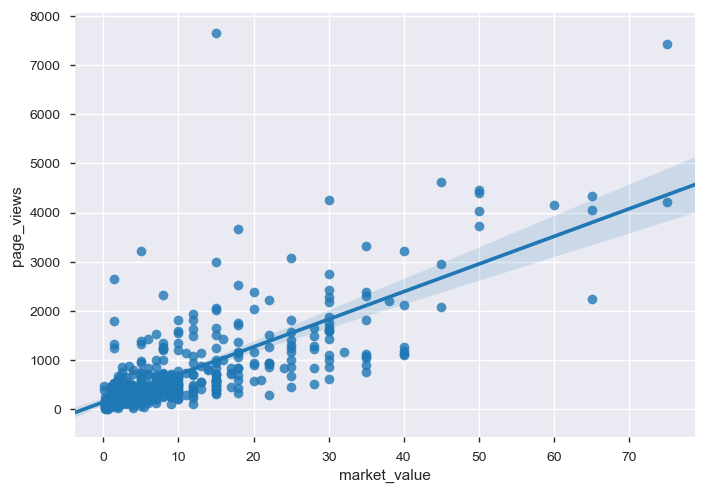

In [13]:
# let's draw a scatter plot between market_value and page_views with a regression line using sns regplot function
sns.regplot(x="market_value", y="page_views", data=df)

### Bokeh

In [41]:
# Create a ColumnDataSource from df: source
source = ColumnDataSource(df)

TOOLS = [CrosshairTool(), PanTool(), ZoomInTool(), ZoomOutTool()]

# Create the figure: p
p = figure(title='Market value vs page views vs fpl value', tools=TOOLS)
p.plot_width = 900
p.plot_height = 600
p.xaxis.axis_label = "market_value"
p.yaxis.axis_label = "page_views"

# Add circle glyphs to the figure p
p.circle('market_value', 'page_views', size='fpl_value', alpha=0.2, source=source)
hover = HoverTool(tooltips=[('Name', '@name'), ('Club', '@club'), ('Age', '@age'), ('Position', '@position'),
                            ('Market value', '@market_value'),
                            ('Page views', '@page_views'),
                            ('Fpl value', '@fpl_value')])

p.add_tools(hover)
show(p)

In [22]:
df.columns

Index(['name', 'club', 'age', 'position', 'position_cat', 'market_value',
       'page_views', 'fpl_value', 'fpl_sel', 'fpl_points', 'region',
       'nationality', 'new_foreign', 'age_cat', 'club_id', 'big_club',
       'new_signing'],
      dtype='object')